<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [873]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1 - Исследование структуры данных

1). Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [874]:
#ваш код здесь

hh_data = pd.read_csv('data\dst-3.0_16_1_hh_database.csv', sep = ';')

2). Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [875]:
#ваш код здесь

display(hh_data.head(3))
print(hh_data.shape)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


(44744, 12)


3). Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [876]:
#ваш код здесь

display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

4). Обратите внимание на информацию о числе непустых значений.

In [877]:
#ваш код здесь

# Создаю список колонок и считаю количество строк, равное максимальному количеству значений
col_list = list(hh_data)
max_number = hh_data.index.max() + 1

# Создаю список колонок с пустыми значениями на будущее, если понадобится
null_columns_list = []

# Считаю нулевые значения
for col in hh_data.columns:
    column_nulls_number = hh_data[col].isnull().sum()
    
    # Если пустые есть, вношу колонку в список, считаю процент и вывожу данные построчно
    if column_nulls_number > 0:
        null_columns_list.append(col)
        column_nulls_percent = round(column_nulls_number / max_number * 100, 3)
        print(f'{col} - количество = {column_nulls_number}, процент = {column_nulls_percent}')

# Вывожу на печать список колонок с пустыми значениями
print()
print('Список колонок с пропусками: ',null_columns_list)

Опыт работы - количество = 168, процент = 0.375
Последнее/нынешнее место работы - количество = 1, процент = 0.002
Последняя/нынешняя должность - количество = 2, процент = 0.004

Список колонок с пропусками:  ['Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность']


5). Выведите основную статистическую информацию о столбцах.


In [878]:
#ваш код здесь

display(hh_data.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# 2 - Преобразование данных

1). Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [879]:
#ваш код здесь

# Оптимальным образом выделяю признак образования и вывожу получившийся список вариантов для проверки
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: x.split(' образование')[0])
print(hh_data['Образование'].unique())

# Считаю повторы по видам образования и выводу количество со средним
school_edu = hh_data['Образование'].value_counts()['Среднее']
print(f'Среднее образование имеют {school_edu} человек')

# Удаляю лишний столбец
hh_data = hh_data.drop('Образование и ВУЗ', axis = 1)


# display(hh_data.head(3))


['Неоконченное высшее' 'Высшее' 'Среднее специальное' 'Среднее']
Среднее образование имеют 559 человек


2). Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [880]:
#ваш код здесь

# Создаю признак пола в формате М и Ж
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x[0])
print(hh_data['Пол'].unique())

# Создаю признак возраста в формате целого числа
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: int(x.split()[2]))

# Считаю процент женских резюме с округлением до сотых
women = round((hh_data['Пол'].value_counts()['Ж'])/max_number * 100, 2)
print(f'Женщин среди соискателей {women} процентов')

# Считаю средний возраст соискателей с округлением до десятых
aver_age = round((hh_data['Возраст'].mean()), 1)
print(f'Средний возраст соискателей - {aver_age} лет')

# Создаю признак даты рождения, чтобы не потерять, хотя и не спрашивают
separator = ' , '
hh_data['Дата рождения'] = hh_data['Пол, возраст'].apply(lambda x: x.split(separator)[2])
hh_data['Дата рождения'] = hh_data['Дата рождения'].str.split().apply(lambda x: str(x[1])+' '+str(x[2])+' '+str(x[3]))

# Удаляю лишний столбик
hh_data = hh_data.drop('Пол, возраст', axis=1)


# display(hh_data.head(3))

['М' 'Ж']
Женщин среди соискателей 19.07 процентов
Средний возраст соискателей - 32.2 лет


3). Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [881]:
#ваш код здесь

# Функция подсчета опыта работы в месяцах
def work_experience(work_exp):
    
    """
    Функция подсчеа опыта работы в месяцах на основании указания опыта в годах и месяцах

    Args: work_exp - строка данных
        
    Returns: months_number - опыт работы в месяцах
        
    """
    
    years_list = ['год', 'года', 'лет']
    months_list = ['месяц', 'месяца', 'месяцев']
    
    months_number = 0
    
    if ((pd.isnull(work_exp)) or (work_exp == 'Не указано')):
        months_number = np.nan
        return months_number
    
    txt = work_exp.split()

    for i in range(0, 7):
              
        if txt[i] in years_list:
            months_number += int(txt[i-1]) * 12
        if txt[i] in months_list:
            months_number += int(txt[i-1])
    
    return months_number


# Применяю функцию к столбцу опыта работы и получаю период работы в месяцах
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(work_experience)

# Считаю медианный опыт работы
median_work_exp = hh_data['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы соискателей в месяцах - {median_work_exp}')

# Создаю столбец опыта работы в годах с долями
hh_data['Опыт работы (лет)'] = hh_data['Опыт работы (месяц)'] / 12 

# Удаляю столбец опыта работы за ненадобностью
hh_data = hh_data.drop('Опыт работы', axis = 1)


# display(hh_data.head(3))

Медианный опыт работы соискателей в месяцах - 100.0


4). Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [882]:
#ваш код здесь


# ------------------------------


# Сначала хочу понять, позволит ли разделитель определенного типа (задаю ниже, например, ' , ') 
# выделить из колонки одинаковое количество частных колонок
# Колонка: "Город, переезд, командировки". Разделитель: ' , '. 
# Определяю, одинаково ли поделятся ячейки этим сепаратором.



# Функция подсчета того, какое количество видов данных содержится в колонке по максимуму 
# и по минимуму и сколько ячеек с количеством меньше максимального
def df_column_min_max_stat(df_column, separator=' , '):

    """
    Функция делит все ячейки колонки на элементы (виды данных) по сепаратору 
    и затем считает минимальное и максимальное количество элементов в ячейках столбца, 
    а также то, сколько есть ячеек с количеством элементов меньше максимального.
    Позволяет понять, можно ли применять индексы для распределения элементов.

    Args: df_column - колонка датафрейма, separator - сепаратор
        
    Returns: 
    len_column - серия с длинами ячеек колонки в штуках элементов, 
    max_len - максимальное количество элементов в ячейке колонки, 
    min_len - минимальное количество элементов в ячейке колонки
        
    """
    
    # Возвращаемые параметры функции df_column_min_max_stat: колонка длин len_column, 
    # максимальная длина max_len, минимальная длина min_len')
        
    # Создаем серию из длин ячеек колонки как результата применения сепаратора
    len_column = df_column.apply(lambda cell: len(cell.split(separator)))
    
    # Максимум и минимум видов данных в серии длин
    max_len = len_column.max() # максимум данных
    max_sum_num = len_column.apply(lambda len_column: 1 if len_column == max_len else 0).sum() # количество максимальных
    min_len = len_column.min() # минимум данных
         
    # Считаю, сколько ячеек содержат видов данных в количестве, меньше максимального
    sum_num = len_column.apply(lambda x: 1 if x < max_len else 0).sum()
    if sum_num > 0:
        
        print(f'''
Результат деления ячеек колонки со смешанными данными на виды данных (на элементы) с помощью сепаратора '{separator}':
Есть ячейки с количеством видов данных, меньше максимального. Максимум видов данных: {max_len}. Минимум видов данных: {min_len}.
Всего ячеек: {max_number}. C максимальным количеством: {max_sum_num}. C дефицитом от максимального: {sum_num}. 
Использовать простую индексацию видов данных для распределения элементов по колонкам невозможно. Необходимо искать включения по ключевым словам.
        ''')
    
        for n_len in range(min_len, max_len+1):
            
            sum_n_len = len_column.apply(lambda x: 1 if x == n_len else 0).sum()
    
            print(f'Количество видов данных: {n_len}. Число ячеек {sum_n_len}.')
    else:
            print(f'''
                  Нет ячеек с количеством видов данных, меньше максимального {max_len}. Всего ячеек: {max_number}. Дефицитных: {sum_num}. 
                  ''')

    print()   
    return len_column, max_len, min_len



# Использую функцию df_column_min_max_stat

separator = ' , '

# Подсчитываю количество ячеек с разным количеством типов данных при заданном разделителе
len_column, max_len, min_len = df_column_min_max_stat(hh_data['Город, переезд, командировки'], separator = separator)
# display(len_column)

# Хочу просмотреть из интереса, что за запись включает 5 видов данных и почему так получилось
index_max = len_column[len_column == max_len].index
# print(list(hh_data['Город, переезд, командировки'][index_max].str.split(separator)))
print(list(hh_data['Город, переезд, командировки'][index_max]))
# display(hh_data.iloc[index_max])

print()
print('------------------------------')
print()



# ------------------------------



# Признак "Город"

print('Признак "Город"')

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(lambda x: x.split()[0])

# Функция категоризации городов
def city_categories(city):
    
    """
    Функция распределяет города по категориям: Москва, Санкт-Петербург, город-миллионник, другие

    Args: city - город
        
    Returns: city - город в формате новой категории
        
    """

    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 
                      'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                      'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    
    if city == 'Москва':
        city = 'Москва'
    elif city == 'Санкт-Петербург':
        city = 'Санкт-Петербург'
    elif city in million_cities:
        city = 'город-миллионник'
    else:
        city = 'другие'
    
    return city
    

# Формирую столбец 'Город'
hh_data['Город'] = hh_data['Город'].apply(city_categories)
cities_list = list(hh_data['Город'].unique())
print(cities_list)
print()



# ------------------------------



# Определяю % соискателей из Санкт-Петербурга

cities_percents = round(hh_data['Город'].value_counts()/max_number * 100, 0)
print('В Санкт-Петербурге проживают ', cities_percents['Санкт-Петербург'], ' процентов соискателей')
print()



# ------------------------------



# Функция выявления в смешанной ячейке формулировок (элементов) по ключевому слову 
# с чтением слева направо до ключа включительно
# Воздействует на колонку датафрейма, ее вызов приводит к замене ячеек датафрейма 
# на укороченнный текст, содержащий ключ
def key_phrase_search_func(cell_list, key='key_phrase', absent_refuses=False, absent_says='absent_says'):
    
    """
    Функция выявляет полную фразу, начинающуюся с начала элемента списка и заканчивающуюся ключевым словом с учетом возможных его окончаний

    Args: 
    cell_list - ячейка со списком элементов, 
    key - ключевое слово, 
    absent_refuses - 'отсутствующий отказывает' - если True, то при отсутствии ключевого слова считаем, 
    что фразы нет и нужно записать параметр absent_says,
    absent_says - 'отсутствующий говорит' - если True, то при absent_refuses этим устанавливается, 
    что запишем при отсутствии ключа
        
    Returns: 
    ready_for_trips - фраза, содержащая ключ (изначально функция сочинялась 
    для поиска готовности к переездам, поэтому ready_for_trips)
        
    """
    
    # Ищу включение '...' в элементах ячейки    
    for i in range(0, len(cell_list)):
                            
        if key in cell_list[i]:
            
            ready_for_trips = ''
            stop_search_symbols_list = [' ', ',', '.']
            
            # Читаю данные от начала элемента до конца ключевого слова с окончанием
            for j in range(0, len(cell_list[i])):
                
                ready_for_trips = ready_for_trips + cell_list[i][j]
                
                if (key in ready_for_trips):
                    
                    if (cell_list[i][j] in stop_search_symbols_list):
                        ready_for_trips = cell_list[i][0:j]
                        return ready_for_trips
                        
                    if (j == len(cell_list[i])-1): 
                        ready_for_trips = cell_list[i][0:j+1]
                        return ready_for_trips
    
    if absent_refuses == True:    
    
        if key not in cell_list:
            
            ready_for_trips = absent_says
            return ready_for_trips
        



# Функция преобразования ячеек в True/False по ключу
def true_false_func(cell, key='keyword', yes_true=True):
    
    """
    Функция преобразует ячейку в True или False по ключу

    Args: cell - ячейка, key - ключевое слово, 
    yes_true - если да (если есть), ставим True, иначе при да ставим False
        
    Returns: cell - результирующее содержание ячейки, True или False
        
    """
    
    if yes_true == True:
        if key in cell:
            cell = True
        else:
            cell = False
        return cell
    
    if yes_true == False:
        if key in cell:
            cell = False
        else:
            cell = True
        return cell



# ------------------------------



# Признак "Готовность к переезду"

print('Признак "Готовность к переезду"')

# Заготавливаю столбец для 'Готовности к переезду', пока что он включает все элементы родительского столбца
separator = ' , '
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(lambda x: x.split(separator))  

# Привожу столбец 'Готовность к переезду' в формат со словесным указанием на готовность и проверяю список выражений
hh_data['Готовность к переезду'] = hh_data['Готовность к переезду'].apply(key_phrase_search_func, key = 'перее', absent_refuses = False)
ready_to_move_list = list(hh_data['Готовность к переезду'].unique())
print(ready_to_move_list)

# Преобразую "Готовность к переезду" в формат True/False
hh_data['Готовность к переезду'] = hh_data['Готовность к переезду'].apply(true_false_func, key = 'не', yes_true = False)
ready_to_move_list = list(hh_data['Готовность к переезду'].unique())
# print(ready_to_move_list)
print()



# ------------------------------



# Признак "Готовность к командировкам"

print('Признак "Готовность к командировкам"')

# Заготавливаю столбец для 'Готовности к командировкам', пока что он включает все элементы родительского столбца
separator = ' , '
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(lambda x: x.split(separator))

# Привожу столбец 'Готовность к командировкам' в формат со словесным указанием на готовность и проверяю список выражений
hh_data['Готовность к командировкам'] = hh_data['Готовность к командировкам'].apply(key_phrase_search_func, 
                                                                                    key = 'командир', absent_refuses = True, 
                                                                                    absent_says = 'не готов к командировкам')
ready_for_trips_list = list(hh_data['Готовность к командировкам'].unique())
print(ready_for_trips_list)

# Преобразую "Готовность к командировкам" в формат True/False
hh_data['Готовность к командировкам'] = hh_data['Готовность к командировкам'].apply(true_false_func, 
                                                                                    key = 'не', yes_true = False)
ready_for_trips_list = list(hh_data['Готовность к командировкам'].unique())
# print(ready_for_trips_list)
print()



# ------------------------------



# Сколько % соискателей готовы одновременно и к переездам, и к командировкам

#mov_and_trip = hh_data[((hh_data['Готовность к переeзду'] == true) & (hh_data['Готовность к командировкам'] == true))

# Функция подсчета пересечений булевских условий в двух колонках датафрейма
def bool_intersection_count(df, name_1='Готовность к переезду', 
                            name_2='Готовность к командировкам', bool_1=True, bool_2=True):
    """
    Функция подсчитывает количество 'пересечений' двух факторов, например, с признаками True или False
    Пересечение - когда в двух столбцах стоят одновременно ожидаемые признаки, например, True и True

    Args: 
    df - датафрейм, 
    name_1 и name_2 - названия двух столбцов, содержащих данные,
    bool_1 и bool_2 - признаки для 1 и 2 фактора, например, True или False,
    выбор дан, чтобы можно было использовать функцию при разных поисках, 
    в том числе по сочетанию True и False, например
        
    Returns:
    intersected - количество строк с правильным пересечением двух факторов
        
    """
    
    intersected = df[(df[name_1] == bool_1) & (df[name_2] == bool_2)].shape[0]
    return(intersected)
    
    
# Подсчет искомого процента
move_and_trip_number = bool_intersection_count(hh_data, name_1 = 'Готовность к переезду', 
                                               name_2 = 'Готовность к командировкам', bool_1 = True, bool_2 = True)
move_and_trip_percent = round(move_and_trip_number / max_number * 100, 0)
print(f'Одновременно к переезду и командировкам готовы {move_and_trip_percent} процента соискателей или {move_and_trip_number} человек из {max_number} соискателей')



# ------------------------------



# На будущее создаю еще столбец 'Готовность к переезду и командировкам' (одновременно)

hh_data['Готовность к переезду и командировкам'] = hh_data.apply(lambda x: True if ((x['Готовность к переезду'] == True) & (x['Готовность к командировкам'] == True)) else False, axis = 1)



# ------------------------------



hh_data = hh_data.drop(['Город, переезд, командировки'], axis = 1)


# display(hh_data.head(3))





Результат деления ячеек колонки со смешанными данными на виды данных (на элементы) с помощью сепаратора ' , ':
Есть ячейки с количеством видов данных, меньше максимального. Максимум видов данных: 5. Минимум видов данных: 2.
Всего ячеек: 44744. C максимальным количеством: 1. C дефицитом от максимального: 44743. 
Использовать простую индексацию видов данных для распределения элементов по колонкам невозможно. Необходимо искать включения по ключевым словам.
        
Количество видов данных: 2. Число ячеек 48.
Количество видов данных: 3. Число ячеек 28680.
Количество видов данных: 4. Число ячеек 16015.
Количество видов данных: 5. Число ячеек 1.

['Санкт-Петербург ,  м. Купчино , готов к переезду (Павловск (Ленинградская область), Пушкин (Ленинградская область) , Колпино) , не готов к командировкам']

------------------------------

Признак "Город"
['другие', 'Москва', 'город-миллионник', 'Санкт-Петербург']

В Санкт-Петербурге проживают  11.0  процентов соискателей

Признак "Готовность к пе

5). Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [883]:
#ваш код здесь


# Проверяю, какие на самом деле варианты есть в колонке 'Занятость'

employment_list = []

new_cell = hh_data['Занятость'].apply(lambda x: x.split(', '))

for i in range(0, max_number):

    for j in range(0, len(new_cell[i])):

        if new_cell[i][j] not in employment_list:

            employment_list.append(new_cell[i][j])

print('Список вариантов для "Занятость":', employment_list)
print()


# Преобразую "Полная занятость" в формат True/False
hh_data['Полная занятость'] = hh_data['Занятость'].apply(true_false_func, key = 'полная занятость', yes_true = True)

# Преобразую "Частичная занятость" в формат True/False
hh_data['Частичная занятость'] = hh_data['Занятость'].apply(true_false_func, key = 'частичная занятость', yes_true = True)

# Преобразую "Проектная работа" в формат True/False
hh_data['Проектная работа'] = hh_data['Занятость'].apply(true_false_func, key = 'проектная работа', yes_true = True)

# Преобразую "Стажировка" в формат True/False
hh_data['Стажировка'] = hh_data['Занятость'].apply(true_false_func, key = 'стажировка', yes_true = True)

# Преобразую "Волонтерство" в формат True/False
hh_data['Волонтерство'] = hh_data['Занятость'].apply(true_false_func, key = 'волонтерство', yes_true = True)


# Сколько людей ищут проектную работу или волонтёрство (в обоих столбцах стоит True)?

projects_and_volunteers_number = bool_intersection_count(hh_data, name_1 = 'Проектная работа', 
                                                         
                                                         name_2 = 'Волонтерство', bool_1 = True, bool_2 = True)
print(f'Желающих заниматься проектной работой или волонтерством - {projects_and_volunteers_number} соискателей')
print()


# ---------------------------------------------



# Проверяю, какие на самом деле варианты есть в колонке 'График'

work_time_list = []

new_cell = hh_data['График'].apply(lambda x: x.split(', '))

for i in range(0, max_number):

    for j in range(0, len(new_cell[i])):

        if new_cell[i][j] not in work_time_list:

            work_time_list.append(new_cell[i][j])

print('Список вариантов для "График":', work_time_list)
print()


# Преобразую "Гибкий график" в формат True/False
hh_data['Гибкий график'] = hh_data['График'].apply(true_false_func, key = 'гибкий график', yes_true = True)

# Преобразую "Полный день" в формат True/False
hh_data['Полный день'] = hh_data['График'].apply(true_false_func, key = 'полный день', yes_true = True)

# Преобразую "Сменный график" в формат True/False
hh_data['Сменный график'] = hh_data['График'].apply(true_false_func, key = 'сменный график', yes_true = True)

# Преобразую "Вахтовый метод" в формат True/False
hh_data['Вахтовый метод'] = hh_data['График'].apply(true_false_func, key = 'вахтовый метод', yes_true = True)

# Преобразую "Удаленная работа" в формат True/False
hh_data['Удаленная работа'] = hh_data['График'].apply(true_false_func, key = 'удаленная работа', yes_true = True)



# Сколько людей хотят работать вахтовым методом или с гибким графиком (в обоих столбцах стоит True)?

shift_and_flexible_number = bool_intersection_count(hh_data, name_1 = 'Вахтовый метод', 
                                                    name_2 = 'Гибкий график', bool_1 = True, bool_2 = True)
print(f'Желающих работать вахтовым методом или на гибком графике - {shift_and_flexible_number} соискателей')
print()



# Удаляю лишние столбцы
hh_data = hh_data.drop(['Занятость'], axis = 1)
hh_data = hh_data.drop(['График'], axis = 1)


# display(hh_data.head(3))

Список вариантов для "Занятость": ['частичная занятость', 'проектная работа', 'полная занятость', 'стажировка', 'волонтерство']

Желающих заниматься проектной работой или волонтерством - 436 соискателей

Список вариантов для "График": ['гибкий график', 'полный день', 'сменный график', 'вахтовый метод', 'удаленная работа']

Желающих работать вахтовым методом или на гибком графике - 2311 соискателей



6). (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [884]:
#ваш код здесь


# Файл курсов валют от MDF.ru

# Читаю файл с курсами валют от MDF.ru
currencies_exchange_rates = pd.read_csv('data\ExchangeRates.csv', sep = ',')
print('Формат таблицы курсов MDF.ru: ', currencies_exchange_rates.shape)
currencies_exchange_rates = currencies_exchange_rates.drop(['per', 'time', 'vol'], axis = 1)

# Привожу даты файла с курсами от MDF.ru в формат datetime 
currencies_exchange_rates['date'] = pd.to_datetime(currencies_exchange_rates['date'])
# display(currencies_exchange_rates[::200].head(3))

# Проверяю тип дат: object или datetime64
print('Тип столбца дат MDF.ru: ', currencies_exchange_rates['date'].dtypes)

# Выясняю точно, какие сокращения по валютам используются в столбце 'currency'
mdf_currencies_list = list(currencies_exchange_rates['currency'].unique())
print('Валюты в изначальной версии MDF.ru: ', mdf_currencies_list)
print()


# Файл hh_data

# Привожу даты колонки 'Обновление резюме' файла hh_data в формат datetime
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'])
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].dt.date
# display(hh_data.head(3))

# Проверяю тип дат: object или datetime64
print('Тип столбца дат hh_data: ', hh_data['Обновление резюме'].dtypes)
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].astype('datetime64[ns]')

# Выясняю точно, какие сокращения по валютам используются в столбце 'ЗП'
hh_currencies_list = list(hh_data['ЗП'].apply(lambda x: x.split()[1]).unique())
print('Валюты в изначальной версии hh: ', hh_currencies_list)
print()


# Выделяю столбцы с суммой и наименованием валюты
hh_data['ЗП (валюта)'] = hh_data['ЗП'].apply(lambda x: x.split()[0])
hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: x.split()[1])
 
# Привожу обозначение денежных единиц в hh_data к формату ISO

# Функция приведения обозначения валюты к ISO
def currency_iso(curr):

    """
    Функция преобразует вольное обозначение валюты в формат ISO

    Args: curr - вольное обозначение валюты
        
    Returns: new_curr - обозначение валюты по ISO
        
    """

    currencies_iso_dict = {'руб.': 'RUB', 'бел.руб.': 'BYN', 'KZT': 'KZT', 'EUR': 'EUR', 'USD': 'USD', 'грн.': 'UAH', 'сум': 'UZS', 'KGS': 'KGS', 'AZN': 'AZN'}
    new_curr = currencies_iso_dict[curr]
    return new_curr

# Вызов функции приведения наименования валюты к формату ISO и проверка по списку уникальных
hh_data['Валюта'] = hh_data['Валюта'].apply(currency_iso) 
hh_iso_currencies_list =  list(hh_data['Валюта'].unique())
print('Валюты в итоговой версии hh в формате ISO: ', hh_iso_currencies_list)
print()
# display(hh_data[hh_data['Валюта'] != 'RUB'][::100].head(30))



# ------------------------



# Присоединяю таблицу с курсами к таблице hh_data по столбцам даты и валюты
hh_data = hh_data.merge(currencies_exchange_rates, how = 'left', 
                        left_on = ['Обновление резюме', 'Валюта'], 
                        right_on = ['date', 'currency'])


# Заполняю 'close' RUB = NaN значениями 1 в файле hh_data
hh_data['close'] = hh_data['close'].fillna(1)

# Проверяю, есть ли в столбцах зарплат в валюте, курсов валют и пропорций пропуски NaN
# display(hh_data.info()) # proportion имеет пропуски, надо заполнить их значениями 1

# Заполняю 'proportion' = NaN значениями 1 в файле hh_data
hh_data['proportion'] = hh_data['proportion'].fillna(1)

# # display(hh_data['proportion'][0], hh_data['proportion'][0].dtype)


# Преобразую столбцы в формат float
hh_data['ЗП (валюта)'] = hh_data['ЗП (валюта)'].astype(float) 
hh_data['close'] = hh_data['close'].astype(float)
hh_data['proportion'] = hh_data['proportion'].astype(float)  

# Рассчитываю ожидаемые зарплаты в рублях по курсу
hh_data['ЗП (руб)'] = hh_data.apply(lambda x: (x['ЗП (валюта)'] * x['close'] / x['proportion']), axis = 1)



# ------------------------



# Удаляю лишние столбцы
hh_data = hh_data.drop(['ЗП'], axis = 1)
hh_data = hh_data.drop(['currency'], axis = 1)
hh_data = hh_data.drop(['date'], axis = 1)

# display(hh_data[::500].head(10))
# display(hh_data.info())


# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?

median_salary = round((hh_data['ЗП (руб)'].median() / 1000), 0)
print('Желаемая медианная зарплата соискателей - ', median_salary)


Формат таблицы курсов MDF.ru:  (5664, 7)
Тип столбца дат MDF.ru:  datetime64[ns]
Валюты в изначальной версии MDF.ru:  ['USD', 'EUR', 'KZT', 'KGS', 'BYN', 'UAH', 'UZS', 'AZN']

Тип столбца дат hh_data:  object
Валюты в изначальной версии hh:  ['руб.', 'бел.руб.', 'KZT', 'EUR', 'USD', 'грн.', 'сум', 'KGS', 'AZN']

Валюты в итоговой версии hh в формате ISO:  ['RUB', 'BYN', 'KZT', 'EUR', 'USD', 'UAH', 'UZS', 'KGS', 'AZN']

Желаемая медианная зарплата соискателей -  59.0


# 3 - Исследование зависимостей в данных





**********

# ВНИМАНИЕ! 

Большинство иллюстраций сделаны в формате plotly.express. Говорят, такие картинки не отражаются на Github. Поэтому отрисовка картинок px командой 'fig.show()' была отключена знаком комментарий '#'. Соответственно, картинки, видимые взамен отключенных, - это скриншоты, не способные измениться при изменении параметров. При желании включить отображение живых картинок из кода проекта, необходимо снять знак комментария перед fig.show(). Для отключения скриншотов нужно наоборот закомментировать соответствующий картинке код 'img src=https://...'




**********




1). Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [885]:
# ваш код здесь

fig = px.histogram(hh_data['Возраст'], x = 'Возраст', title = 'Распределение возраста', 
                   nbins = 100, marginal = 'box', width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_1_age_px_hist.html')

age_22_41_number = hh_data[(hh_data['Возраст'] > 21) & (hh_data['Возраст'] < 42)].shape[0]
age_22_41_percent = round(age_22_41_number / max_number * 100)
print(f'Возраст от 22 до 41 года включительно имеют {age_22_41_number} или {age_22_41_percent} процентов соискателей')

Возраст от 22 до 41 года включительно имеют 37787 или 84 процентов соискателей


<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_1_age_px_hist.png>


Мода распределения по возрасту - 30 лет. Возможно, это связано с тем, что к этому возрасту люди уже могут описать в резюме опыт работы и рационально расчитывать на успех в поиске заинтересованного работодателя. При меньшем возрасте активность падает, т.к. еще нет опыта. При большем - падает, так как уже есть репутация и работа ищется 'сама' либо уже нет веры в перспективы и работа ищется по знакомым какая придется.
Возраст большинства соискателей находится в диапазоне от 14 до 49 лет по лимитам коробки. Но лимиты коробки - это условность.
50% соискателей имеют возраст от 27 до 36 лет, судя по квартилям коробки 25% и 75%. Но 50% - это половина, а не большинство. 
На основе визуальной оценки я бы считал диапазоном возрастов большинства соискателей диапазон от 22 до 41 года включительно.
Расчет показал, что соискателей с возрастом от 22 по 41 год включительно - 84 процента от всех соискателей базы.
Есть аномальные выбросы (100 лет - точно, 76-77 - нужно посмотреть...). Необходимо проанализировать их и 100-летних сразу исключать из статистики, а по другим определиться по итогу просмотра.

2). Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [886]:
# ваш код здесь

fig = px.histogram(hh_data['Опыт работы (месяц)'], x = 'Опыт работы (месяц)', title = 'Распределение опыта работы (месяц)', 
                   nbins = 200, marginal = 'box', width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_2_experience_px_hist.html')

# Вывел в таблицу данные о людях с опытом большим, чем возраст минус 14 лет 
# (условное начало трудового пути по минимуму). Они указали явно нереальный опыт.
display(hh_data[hh_data['Опыт работы (лет)'] > (hh_data['Возраст'] - 14)].sort_values(by = 'Опыт работы (месяц)', ascending = False))



,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Дата рождения,Опыт работы (месяц),...,Гибкий график,Полный день,Сменный график,Вахтовый метод,Удаленная работа,ЗП (валюта),Валюта,close,proportion,ЗП (руб)
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,Высшее,М,48,27 января 1971,1188.0,...,True,True,False,True,True,60000.0,RUB,1.0000,1.0,60000.00
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,Высшее,М,14,1 января 2005,477.0,...,False,True,False,False,False,60000.0,RUB,1.0000,1.0,60000.00
19351,Специалист (Junior-программист),"Русский свет, ООО",Электрик,2019-04-26,Не указано,Высшее,М,28,4 сентября 1990,470.0,...,False,True,False,False,False,20000.0,RUB,1.0000,1.0,20000.00
43451,Руководитель отдела разработки,ЛАНИТ,Руководитель проекта,2018-08-17,Не указано,Высшее,М,36,31 марта 1983,434.0,...,False,True,False,False,False,200000.0,RUB,1.0000,1.0,200000.00
19872,Аналитик,Kyivstar,Фахівець з опису бізнес процесів,2019-04-26,Не указано,Высшее,М,34,12 ноября 1984,416.0,...,False,True,False,False,False,25000.0,UAH,24.2962,10.0,60740.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43098,QA junior engineer,Тинькофф Банк,Кредитный эксперт,2019-04-22,Не указано,Неоконченное высшее,М,19,29 апреля 1999,64.0,...,True,True,True,False,True,60000.0,RUB,1.0000,1.0,60000.00
31054,Программист Java,Google Inc.,Менеджер проекта,2019-04-26,Не указано,Высшее,М,17,18 мая 2001,60.0,...,False,True,False,False,False,1000000.0,KZT,17.0151,100.0,170151.00
18210,Руководитель web-разработки,Vectra WEB-Studio,"Владелец, руководитель веб-студии",2019-06-04,Не указано,Неоконченное высшее,М,18,17 июля 2000,54.0,...,True,True,True,False,True,60000.0,RUB,1.0000,1.0,60000.00
29292,Ассистент фотографа,Мосволонтер,Фотограф,2019-04-26,Не указано,Среднее специальное,М,17,10 июля 2001,52.0,...,True,False,False,False,False,10000.0,RUB,1.0000,1.0,10000.00


<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_2_experience_px_hist.png>


Мода распределения опыта работы - 80-89 месяцев, что соответствует 6-7 годам опыта.
Предельное значение признака снизу - 0, без опыта. Бывает. Люди без опыта вполне могут быть активными на хедхантере, так как это - знакомая с интернетом молодежь.
Предельное значение сверху - 1188 месяцев или примерно 100 лет, что является нереальным показателем, т.е. аномалией, и подлежит исключению из статистики. 
Половина людей имеет опыт от 57 до 154 месяцев - это опыт примерно 4-13 лет.
Визуально имеет смысл считать, что большинство данных распределено в диапазоне опыта от 0 до 200 месяцев, что идентично периоду от 0 до 16-17 лет. Максимальный возраст таких соискателей примерно 30-31 года, если отсчитывать опыт от 14 лет.
Те, кто старше и может иметь опыт свыше 17 лет, уже реже подает заявления на поиск работы. Это может быть связано и с уже заработанной репутацией, с одной стороны, и с поиском по знакомству через коллег и друзей, и, при высоком возрасте, с неверием в то, что через резюме можно найти работу.
В базе (это видно по фильтрованной таблице, а не по диаграмме) есть 73 строки, в которых опыт работы больше возраста минус 14 лет (люди начинают трудовой путь как правило не раньше 14 лет; если брать за минимальный возраст начала трудового пути 16 лет, то таких уже 336 человек). Опыт по этим строкам требует корректировки: либо установить, что максимально их опыт = возраст минус 14 лет, либо для кого-то - обнулить опыт вообще на основании того, что предоставление соискателем подложных данных вызывает серьезные подозрения в его профессионализме. Есть 15-летние лица с опытом работы в несколько месяцев, в теории это сейчас возможно.
В зависимости от задач, стоит осторожно отнестись и к такому опыту, величина которого больше 50 лет, что соответствует возрасту человека от 64 лет, если считать, что человек начал трудиться в 14 лет. Такие соискатели могут существовать реально, они вызывают уважение, и их интересы нужно учитывать в реальной работе. Они не аномальны. Но, с одной стороны, их мало, а с другой, их включение в статистику изменяет картину по основной группе, выходящей на рынок труда. В конечном итоге вопрос в том, что хочется проанализировать - всю базу или ее наиболее активную часть.


3). Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [887]:
# ваш код здесь

fig = px.histogram(hh_data['ЗП (руб)'], x = 'ЗП (руб)', title = 'Распределение ожидаемых зарплат (руб)', 
                   nbins = 500, marginal = 'box', width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_3_1_salary_all_px_hist.html')

fig = px.histogram(hh_data[hh_data['ЗП (руб)'] < 1000000]['ЗП (руб)'], x = 'ЗП (руб)', 
                   title = 'Распределение ожидаемых зарплат (руб, до 1 млн)', 
                   nbins = 500, marginal = 'box', width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_3_2_salary_1_mln_px_hist.html')

# Интересно, кто указал ожидаемую ЗП от 1 млн:
display(hh_data[hh_data['ЗП (руб)'] >= 1000000])

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Дата рождения,Опыт работы (месяц),...,Гибкий график,Полный день,Сменный график,Вахтовый метод,Удаленная работа,ЗП (валюта),Валюта,close,proportion,ЗП (руб)
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,Высшее,М,31,31 мая 1987,115.0,...,True,True,True,False,True,380000.0,USD,63.9602,1.0,24304876.0
28253,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,2019-04-27,Имеется собственный автомобиль,Высшее,М,39,31 мая 1979,280.0,...,True,True,False,True,True,3000000.0,RUB,1.0000,1.0,3000000.0
32325,"Менеджер, Руководитель группы",ОТР 2000,Менеджер инцидентов,2019-04-22,Не указано,Высшее,Ж,26,3 марта 1993,42.0,...,False,True,False,False,True,1000000.0,RUB,1.0000,1.0,1000000.0
39191,Специалист по IT,"ТОО ""AMS""",Системный администратор,2019-04-22,Не указано,Среднее специальное,М,29,21 апреля 1990,98.0,...,False,True,False,False,False,120000.0,USD,63.9602,1.0,7675224.0
41924,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,2019-04-22,Не указано,Неоконченное высшее,М,24,27 декабря 1994,39.0,...,True,True,False,False,True,1750000.0,RUB,1.0000,1.0,1750000.0
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,Высшее,М,38,10 февраля 1981,97.0,...,False,True,False,False,False,2500000.0,RUB,1.0000,1.0,2500000.0


<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_3_1_salary_all_px_hist.png>

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_3_2_salary_1_mln_px_hist.png>



Мода ожидаемой зарплаты - 25-75 тысяч рублей при рассмотрении всей базы.
Мода при исключении из рассмотрения аномальных желаемых зарплат свыше 1 млн - 50-52 тяс рублей.
Предельное значение сверху - 24,3 млн рублей.
Предельное значение снизу - около 0 (диапазон 0-1999 руб по диаграмме), видимо, человек ищет подработку.
На картинке большего масштаба, где исключены ожидаемые зарплаты от 1 млн и выше, видно, что ожидаемые ЗП привязываются к психологическим уровням: кратны 5, 10, 50, 100. Поэтому распределение описывается не плавной линией, а 'частоколом'.
Явной аномалией является желание программиста получать 24,3 млн рублей. Он указал 380000 долларов в качестве ожидаемой зарплаты. К аномалии я бы отнес и системного администратора с желанием получать 120 тыс долларов или 7,4 млн рублей. Вероятнее всего, они хотели указать рубли, но ошиблись с выбором валюты. По идее, надо править. А вообще, если бы можно было удалить их резюме вообще, никто бы из работодателей не пострадал. Системный администратор или программист 29-31 года, которые на ПК не могут выбрать валюту в спадающем списке, - это заведомо плохие специалисты. Но удалять нельзя - мы просто обрабатываем статистику.
Большинство соискателей укладывают ожидаемую ими зарплату в диапазон от 20-25 до 100 тысяч рублей.


4). Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [888]:
# ваш код здесь

hh_education_grouped = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby(by = 'Образование')['ЗП (руб)'].median()

fig = px.bar(hh_education_grouped, title = 'Распределение ожидаемых зарплат (руб, до 1 млн) от уровня образования', 
             width = 800, labels = {'value': 'ЗП (руб)', 'variable': 'Легенда'})
# fig.show()
fig.write_html('project_1_hh_diagrams/3_4_edu_px_bar.html')

display(hh_education_grouped.head(5))


Образование
Высшее                 60000.0
Неоконченное высшее    50000.0
Среднее                40000.0
Среднее специальное    40000.0
Name: ЗП (руб), dtype: float64

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_4_edu_px_bar.png>


Желаемая ЗП максимальна для соискателей с высшим образованием: медианная ЗП - 60 тыс руб.
На втором месте по ожиданию - лица с неоконченным высшим: медианная ЗП - 50 тыс рублей.
Желаемая ЗП минимальна для соискателей со средним образованием и со средним специальным: медианная ЗП - по 40 тыс рублей.
Очевидно, что человек с более высоким уровнем образованием ценит себя выше изначально, и изначально он был нацелен на более высокий доход, еще с тех пор, как поступал в ВУЗ. Реальная экономика, конечно, может выглядеть и так, что слесарь получает больше инженера, но этот аспект люди в момент выбора, идти ли на высшее, не могут учитывать, т.к. он нерационален. Поэтому существует явная связь между уровнем образования и ожидаемой зарплатой. И, одновременно, при всех перегибах реальной экономики все-таки лица с высшим образованием более склонны к управленческому труду, к труду в сфере высоких технологий, а в этих сферах зарплаты явно выше, чем в широком спектре рабочих профессий, даже если где-то слесарь получает больше инженера. Поэтому и работодатели предлагают более высокие заработные платы людям с более высоким уровнем образования. Прямая связь между уровнем образования и зарплатой существует, и она обоснована.

5). Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [889]:
# ваш код здесь

hh_city_grouped = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby(by = 'Город')['ЗП (руб)'].median()

fig = px.bar(hh_city_grouped, title = 'Распределение медианных ожидаемых зарплат (руб, до 1 млн) от города', 
             width = 800, labels = {'value': 'ЗП (руб)', 'variable': 'Легенда'})
# fig.show()
fig.write_html('project_1_hh_diagrams/3_5_1_city_px_bar.html')

display(hh_city_grouped.head(5))

fig = px.box(hh_data[hh_data['ЗП (руб)'] < 1000000], x = 'Город', y = 'ЗП (руб)',
             title = 'Распределение фактических ожидаемых зарплат (руб, до 1 млн) от города', width = 800
             )
# fig.show()
fig.write_html('project_1_hh_diagrams/3_5_2_city_px_box.html')


Город
Москва              85000.0
Санкт-Петербург     60000.0
город-миллионник    40000.0
другие              40000.0
Name: ЗП (руб), dtype: float64

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_5_1_city_px_bar.png>

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_5_2_city_px_box.png>


Анализ по столбчатой диаграмме с медианными зарплатами
Закономерно то, что столица показала максмиальные ожидания соискателей по зарплате. Вторая столица - на втором месте. Эти ожидания - не только выбор соискателей, но и результат того, что работодатели в стролице платят лучше. Столичный бизнес, работающий и с большим собственным населением, и с клиентской базой всей страны, участвует в сделках большего объема и в большем объеме сделок, и очевидно, что он часто более прибылен, чем бизнес в небольших городах. От прибыльности зависят и зарплаты. Вместе с тем, конечно, нужно понимать, что разница зарплат между столицей и небольшим городом зависит еще и от того, какие должности рассматриваются. Диаграмма этой информации не дает. Но понятно, что кассиры продуктовых магазинов столицы и городка в регионе по зарплатам более похожи, чем фыинансисты.
Неожиданный вывод, который позволила сделать диаграмма: ожидаемые зарплаты в городах-миллионниках идентичны таковым в других городах. Мне всегда казалось, что между зарплатами этих категорий должна быть разница. Однако, по-видимому, сами соискатели так не считают. Возможно, их ожидания основаны на том, как в их городах обычно платят работодатели. Если так, работодатели миллионников явно экономят на людях. Альтернатива: соискатели маленьких городов хотят жить не хуже, чем в городах-миллионниках, и поэтому их ожидания завышены. Если так, можно предположить, что в маленьких городах сложно искать наемных сотрудников с ожиданиями, соответствующими реальным доходам бизнеса.
Еще миллионников и обычные города могут примирять зарплаты бюджетников. Бюджет платит везде примерно одинаково, и склонные к работе в бюджетной сфере люди знают уровни зарплат.

6). Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [890]:
# ваш код здесь

#hh_data.info()

hh_move_grouped = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby(by = 'Готовность к переезду')['ЗП (руб)'].median()
hh_move_grouped = hh_move_grouped.rename('Готовность к переезду')

hh_trip_grouped = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby(by = 'Готовность к командировкам')['ЗП (руб)'].median()
hh_trip_grouped = hh_trip_grouped.rename('Готовность к командировкам')

hh_move_trip_grouped = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby(by = 'Готовность к переезду и командировкам')['ЗП (руб)'].median()
hh_move_trip_grouped = hh_move_trip_grouped.rename('Готовность к переезду и командировкам')

hh_move_trip_grouped_table = pd.concat([hh_move_grouped, hh_trip_grouped, hh_move_trip_grouped], axis = 1)

hh_move_trip_grouped_table['Готовность'] = hh_move_trip_grouped_table.index
hh_move_trip_grouped_table = hh_move_trip_grouped_table.reindex(
    ['Готовность', 'Готовность к переезду', 'Готовность к командировкам', 'Готовность к переезду и командировкам'], axis = 1)

display(hh_move_trip_grouped_table)

fig = px.bar(hh_move_trip_grouped_table, x = 'Готовность', 
             y = ['Готовность к переезду', 'Готовность к командировкам', 'Готовность к переезду и командировкам'],
             title = 'Связь ожидаемых зарплат (до 1 млн) и готовности  переездам и командировкам', width = 800, barmode = 'group',
             labels = {'value': 'ЗП (руб)', 'variable': 'Легенда'})
# fig.show()
fig.write_html('project_1_hh_diagrams/3_6_move_trip_px_bar.html')



,Готовность,Готовность к переезду,Готовность к командировкам,Готовность к переезду и командировкам
False,False,50000.000,40000.0,50000.000
True,True,64131.165,65000.0,65666.955


<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_6_move_trip_px_bar.png>


Готовые к переездам и командировкам закономерно ожидают более высоких зарплат, чем неготовые к такой активности. Фактически они требуют плату за неудобства, которые доставляет деятельность, связанная с передвижением или сменой места жительства.
В категории соискателей, готовых к переездам и командировкам, ожидаемая медианная зарплата приблизительно одинакова для всех трех вариантов. Да, можно сказать, что те, кто готов и к переезду, и к командировкам, ожидают чуть больше, чем те, кто готов к одному из двух. А те, кто готов к командировкам, ожидают больше, чем те, кто готов к переезду. Однако, разница между ожидаемыми медианными зарплатами для готовых в переездам и командировкам невелика, 1-2%. Несколько странно то, что формально те, кто готов переезжать, просят чуть меньше тех, кто готов к командировкам. Возможно, это следствие того, что они не расчитывают найти устраивающую их зарплату у себя дома и, понимая, что в другом городе итак есть свои жители, слегка демпингуют. Но все же разница в 1% - не критична и не является чем-то заслуживающим пристального внимания.
В категории неготовых к перездам и/или командировкам ожидаемая зарплата готовых к переезду равна ожидаемой зарплате готовых ко всему, а ожидания готовых к командировкам ниже. Вероятно, категоричность неготовых переезжать имеет своим источником то, что они дорожат личным комфортом, в связи с чем отказываются менять место жительства, и результатом этого их отношения к самим себе является то, что такие люди оценивают себя выше, даже, быть может, и вопреки мнению работодателей на эту тему. Те же, кто не готов к командировкам, похоже, оценивают ниже не себя, а готовность работодателя платить. Они в большей степени склонны к компромиссу с работодателем на тему зарплаты, если их не станут отправлять в командировки.

7). Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [891]:
# ваш код здесь

# Сводная таблица:

hh_age_education_pivot = hh_data.pivot_table(
    values = 'ЗП (руб)',
    index = 'Возраст',
    columns = 'Образование',
    fill_value = 0,
    aggfunc = 'median'
    ).round()

hh_age_education_pivot = hh_age_education_pivot.sort_index(ascending = False)

# imshow тепловая карта

# display(hh_age_education_pivot)

fig = px.imshow(hh_age_education_pivot, 
                         title = 'Зависимость ожидаемой зарплаты от образования и возраста',
                         width = 800, color_continuous_scale = 'blues')
# fig.show()
fig.write_html('project_1_hh_diagrams/3_7_1_age_edu_px_imshow.html')

# 2d тепловая карта plotly.express

fig = px.density_heatmap(hh_data, 
                         x = 'Возраст',
                         y = 'Образование',
                         title = 'Связь образования и возраста, без рассмотрения зарплат',
                         nbinsx = 20, marginal_x = 'box', marginal_y= 'box', 
                         width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_7_2_age_edu_px_density_heatmap.html')

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_7_1_age_edu_px_imshow.png>

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_7_2_age_edu_px_density_heatmap.png>


По верхней диаграмме, связывающей зарплату, образование и возраст, видно, что:
Соискатели с более высоким уровнем образования склонны ожидать больших зарплат.
Соискатели с высшим образованием наиболее требовательны к уровню зарплат и наиболее активны в широком диапазоне возрастов.
Соискатели с другими видами образования (любое не-высшее) после 60 ожидают очень мало. Вероятно, они в этот период ориентируются на выполнение работ, не требующих высокой квалификации. Эта ориентация - следствие существующей в обществе дискриминации по признаку возраста. Людям с высшим образованием и опытом в этом дискриминирующем мире полегче, чем людям с не-высшим образованием.
Лица в возрасте 57-66 лет при любом образовании, кроме среднего, склонны запрашивать больше, тыс от 60-80 примерно. Возможно, те, кто подает резюме в этом возрасте, либо имеют репутацию профессионалов с большим опытом, либо уже просто надеються на случай.
Нижняя часть диаграммы - зона аномальных возрастов, до 100 лет.
Формально, согласно диаграмме, есть очень молодые люди якобы с высшим и неоконченным высшим образоованием, наивно считающие возможным сразу получать большие деньги. Однако, их строки нужно проанализировать конкретно, так как в возрасте 15-17 лет высшее образование еще невозможно получить, а это значит, что, скорее всего, они предоставили недостоверную информацию о себе.
По нижней дополнительной диаграмме, связывающей только образование и возраст, видно, что:
Максимальное количество резюме заполнили люди с высшим образованием в возрасте 25-34 лет. Это коррелирует с ранее сделанным выводом о том, что возраст вблизи 30 лет - возраст наибольшей активности в поиске работы.
В целом люди с высшим образованием более активны в поиске работы через резюме. 

8). Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Выше контрольной прямой (x = [0, 100], y = [0, 100]) лежат 7 точек


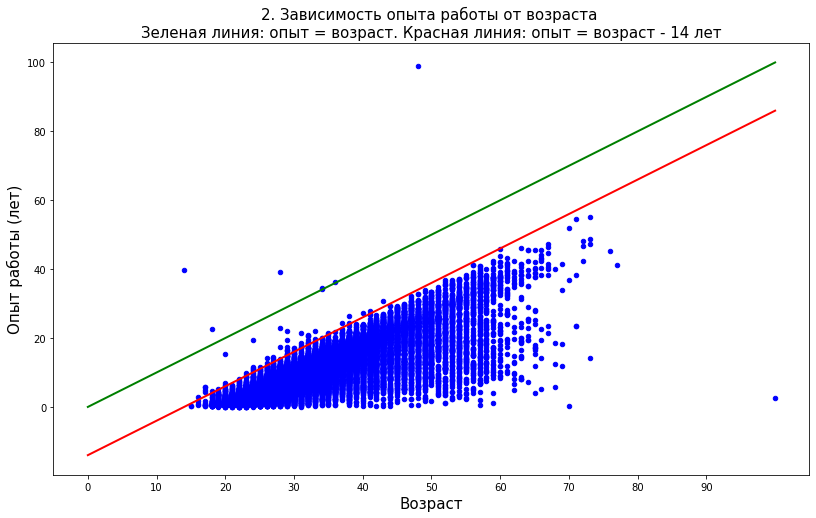

In [892]:
# ваш код здесь

# Вариант 2 - plotli.express scatter без линии

fig = px.scatter(hh_data, x = 'Возраст', y = 'Опыт работы (лет)',
                 title = '1. Зависимость опыта работы от возраста (plotly.express - без контрольной линии)',
                 width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_8_1_experience_age_px_scatter.html')

# Вариант 1 - matplotlib scatter с линией

fig = plt.figure(figsize = (10.5, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x = hh_data['Возраст'],
    y = hh_data['Опыт работы (лет)'],
    s = 20,
    marker = 'o',
    c = 'blue'
    )
x = np.array([0, 100])
y = np.array([0, 100])
axes.plot(x, y, lw = 2, c = 'green')
x_14 = np.array([0, 100])
y_14 = np.array([0, 100]) - 14
axes.plot(x_14, y_14, lw = 2, c = 'red')
axes.set_title('2. Зависимость опыта работы от возраста \nЗеленая линия: опыт = возраст. Красная линия: опыт = возраст - 14 лет', size = 15)
axes.set_xlabel('Возраст', size = 15)
axes.set_ylabel('Опыт работы (лет)', size = 15)
axes.axes.tick_params('both', labelsize = 10, rotation = 0)
axes.set_xticks(range(0, 100, 10))

# Сколько точек лежат строго выше построенной прямой? (для зеленой контрольной линии x = [0, 100], y = [0, 100]) 
# Так как точки могут сливаться с прямой, для ответа получить таблицу с наблюдениями, лежащими выше прямой, с помощью фильтрации.

hh_controle_line = hh_data[hh_data['Опыт работы (лет)'] > hh_data['Возраст']]
hh_controle_line_number = hh_controle_line.shape[0]
print(f'Выше контрольной прямой (x = [0, 100], y = [0, 100]) лежат {hh_controle_line_number} точек')
# display(hh_controle_line[['Опыт работы (лет)', 'Возраст']])

Анализирую диаграмму, созданную на matplotlib, с нанесенными контрольными линиями.
Задача подразумевала наличие контрольной линии, для которой опыт равен возрасту: зеленая линия. Считаю, что условие надо уточнить. Человек не может начать получать опыт, только-только родившись. Трудовой путь начинают с возраста не младше 14 лет. Поэтому красная контрольная линия смещена на 14 лет вниз и закономерно показывает на большее количество аномалий.

Диаграмма дает следующую информацию:
В целом с увеличением возраста клиентской базы увеличивается и ее опыт работы. 
Однако, есть много соискателей, которые при существенном возрасте указывают минимальный опыт работы. Вероятнее всего, эти соискатели указывали опыт работы именно в той сфере, где они ищут работу, не перечисляя опыт на должностях, не связанных напрямую с искомыми должностями. Однако, информация о других работах могла бы быть полезна работодателям.
Есть аномалии. Кто-то указал слишком большой возраст - 100 лет. Кто-то указывает слишком большой опыт, не совместимый не только с его числым возрастом, но и с возрастом, уменьшенным на 14 лет детства. Такие аномалии должны быть приведены в минимальное соответствие с реальностью: опыт должен быть или уменьшен до максимально возможного, или обнулен на основании недоверия к данным, или усреднен между этими двумя величинами. Радует, что в основном люди об опыте не врут - их метки ниже контрольных линий.
Активность молодых более высока, чем активность людей в возрасте. Хотя метки для высоких возрастов и разряжены, а для молодежи - сконцентрированы, все же видно, что есть общая концентрация резюме на возрастах от 20 до 40. 

Для интереса строил диаграмму в plotly.express, но она не позволила нарисовать линии.

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_8_1_experience_age_px_scatter.png>


** 9 - Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [893]:
# ваш код здесь

# Выделю ЗП до вменяемого 1000000 и реальный опыт меньше возраста минус 16 лет
hh_data_1000000 = hh_data[(hh_data['ЗП (руб)'] < 1000000) & (hh_data['Опыт работы (лет)'] < hh_data['Возраст'] - 16)]

display(hh_data_1000000.head(1))
# display(hh_data_1000000.info())

# Заинтересовало влияние пола на ожидание


# Зависимость ожидаемой зарплаты (до 1 млн) от возраста с категоризацией по полу

# experience_nan = hh_data_1000000[hh_data_1000000['Опыт работы (месяц)'] < 1]
# display(experience_nan)

fig = px.scatter(hh_data_1000000, x = 'Возраст', y = 'ЗП (руб)', color = 'Пол',
                 title = 'Взаимосвязь ожидаемой ЗП (до 1 млн), возраста и пола',
                 width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_9_1_age_gender_px_scatter.html')


# Зависимость ожидаемой зарплаты (до 1 млн) от опыта с категоризацией по полу

fig = px.scatter(hh_data_1000000, x = 'Опыт работы (лет)', y = 'ЗП (руб)', color = 'Пол',
                 title = 'Взаимосвязь ожидаемой ЗП (до 1 млн), опыта и пола',
                 width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_9_2_experience_gender_px_scatter.html')


# Зависимость ожидаемой зарплаты (до 1 млн) от опыта с категоризацией по полу

fig = px.scatter(hh_data_1000000, x = 'Возраст', y = 'Опыт работы (лет)', color = 'Пол',
                 title = 'Взаимосвязь возраста, опыта и пола (для соискателей и ожидаемой ЗП до 1 млн)',
                 width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_9_3_age_experience_gender_px_scatter.html')


# Зависимость медианных ожидаемых зарплат от пола

hh_gender_grouped = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby(by = 'Пол')['ЗП (руб)'].median()

fig = px.bar(hh_gender_grouped, title = 'Распределение ожидаемых зарплат (руб, до 1 млн) от пола', width = 800)
# fig.show()
fig.write_html('project_1_hh_diagrams/3_9_4_gender_px_bar.html')



,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Дата рождения,Опыт работы (месяц),...,Гибкий график,Полный день,Сменный график,Вахтовый метод,Удаленная работа,ЗП (валюта),Валюта,close,proportion,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,27 ноября 1979,202.0,...,True,True,True,True,True,29000.0,RUB,1.0,1.0,29000.0


<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_9_1_age_gender_px_scatter.png>

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_9_2_experience_gender_px_scatter.png>

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_9_3_age_experience_gender_px_scatter.png>

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_9_4_gender_px_bar.png>



Построил диаграммы, позволяющие проанализировать интересы полов - мужчин и женщин.
1) По диаграмме 'Взаимосвязь ожидаемой ЗП (до 1 млн), возраста и пола'
Женщины ожидают меньших зарплат, чем мужчины. Причина может быть вовсе не в несправедливости общественного устройства, а в природных здоровых склонностях и личных здоровых же предпочтениях. Мужчины все еще более склонны к риску, управленческой деятельности, деятельности в сфере инженерии и IT и т.п., чем дамы, а именно там - более высокие доходы. Дамы же могут быть более склонны к работе с людьми, где традиционно меньшие зарплаты (врачи, учителя, швеи). Никто ни в чем здесь не виноват.
И женщины, и мужчины ожидают больше в возрасте 30-40 лет и снижают ожидания при уменьшении и увеличении возраста.
Мужчины склонны к более 'наглым' ожиданиям по зарплате: вверху видно больше одиночных удаленных точек, даже при том, что рассматриваются отфильтрованные зарплаты с размером менее 1 млн.
2) По диагремме 'Взаимосвязь ожидаемой ЗП (до 1 млн), опыта и пола'
Картина аналогичная. Это ожидаемо, так как опыт работы в годах коррелирует в возрастом.
3) По диаграмме 'Взаимосвязь возраста, опыта и пола (для соискателей и ожидаемой ЗП до 1 млн)'
В старшем возрасте за 50 мужчины более активны в поиске работы, чем дамы. Дамы постепеннно прекращают искать работу, а мужчины продолжают ее искать достаточно долго, лет до 65. Это можно объяснить тем, что пенсионный возраст мужчин сдвинут дальше и перед мужчинами даже после 50-55-60 стоит острый вопрос где продолжать работать еще 5-10 лет минимум. 
4) По диаграмме 'Распределение ожидаемых зарплат (руб, до 1 млн) от пола'
Ожидаемая дамами медианная зарплата - 48 тыс рублей.
Ожидаемая мужчинами медианная зарплата - 60 тыс рублей.
Это коррелирует с выводами, сделаными по диаграмме 'Взаимосвязь ожидаемой ЗП (до 1 млн), возраста и пола'.

In [894]:
# ваш код здесь

# Еще проанализирую мигалки готовности к разным видам занятости и режимам работы
 
# display(hh_data.info())
# display(hh_data.head(3))
# col_list = list(hh_data.columns)
# print(col_list)

work_format = ['Полная занятость', 'Частичная занятость', 'Проектная работа', 'Стажировка', 'Волонтерство']
work_time = ['Гибкий график', 'Полный день', 'Сменный график', 'Вахтовый метод', 'Удаленная работа']

def make_true_false_table(data_frame, target_list):

    """
    Функция создает из датафрейма с бинарными признаками True и False компактную табличку
    с количеством уникальных признаков по столбцам для дальнейшей отрисовки ее на диаграмме

    Args: data_frame - датафрейм, target_list - список обрабатываемых столбцов
        
    Returns: res_data_frame - итоговая табличка с индексами True и False и столбцами из списка
        
    """
    
    res_data_frame = pd.DataFrame(columns = target_list, index = [False, True])
        
    for element in target_list:
            
        element_list = data_frame[element].value_counts()

        for x in element_list.index:
 
            res_data_frame.loc[x, element] = element_list[x]

    return res_data_frame
            

work_format_table = make_true_false_table(hh_data, work_format)
display(work_format_table)


fig = px.imshow(work_format_table, y = work_format_table.index, x = work_format,
             title = 'Мигалки готовности по видам занятости', width = 800, 
             labels = {'value': 'Количество', 'variable': 'Легенда'}
             )
# fig.show()
fig.write_html('project_1_hh_diagrams/3_9_5_work_format_px_imshow.html')


work_time_table = make_true_false_table(hh_data, work_time)
display(work_time_table)

fig = px.imshow(work_time_table, y = work_time_table.index, x = work_time,
             title = 'Мигалки готовности по режиму дня', width = 800, 
             labels = {'value': 'Количество', 'variable': 'Легенда'}
             )
# fig.show()
fig.write_html('project_1_hh_diagrams/3_9_6_work_time_px_imshow.html')


,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство
False,1460,31608,36676,41940,44258
True,43284,13136,8068,2804,486


,Гибкий график,Полный день,Сменный график,Вахтовый метод,Удаленная работа
False,29160,3028,32019,41660,29722
True,15584,41716,12725,3084,15022


<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_9_5_work_format_px_imshow.png>

<img src=https://raw.githubusercontent.com/gleish/sf_ds/main/project_1_hh/project_1_hh_diagrams/3_9_6_work_time_px_imshow.png>



1) Режим занятости
Максимальное количество соискателей нацелены на полную занятость. 
Все прочие формы занятости, включая ближайшего конкурента - частичную занятость, отстают с большим отрывом.
Логично, что люди не приветствуют частичную занятость, поскольку она дает низкий доход.
Проектная работа также мало интересует людей, поскольку такую форму работы люди, видимо, считают нестабильной, разовой, когда работодатели могут нанять и могут расстаться.
Минимальный интерес люди испытывают к стажировке и волонтерству. Это ожидаемо, ведь в этих сферах низкие доходы.
2) Режим работы
Максимальное количество соискателей нацелены на работу в режиме полного рабочего дня. Этот режим обеспечивае максимальный доход и стабильность. 
Уже ближайший конкурент - удаленная работа - следует за полным рабочим днем с большим отрывом. Возможно, непопулярность удаленной работы, однако, связана не с суммой оплат, а с тем, что система удаленной работы просто еще недостаточно развита.
Гибкий график и сменный график следуют за удаленной работой. Вероятно, людей не привлекает в них то, что при гибком и сменном графике сложно прогнозировать рабочее время и отдых, и это осложняет жизнь. 
Минимальный интерес люди испытывают к вахтовому методу. Видимо, это связано с его некомфортностью для жизни в семье: приходится надолго уезжать, покидать свой населенный пункт, свой дом, семью.
3) Общее
Идеальной работой люди считают работу на полный рабочий день при полной занятости. Такой формат гарантирует заинтересованность работодателя, постоянный доход, более-менее определенную заработную плату, взносы в пенсионный фонд, больничные и прочее. Также этот формат позволяет соискателю реализовать свой профессиональный потенциал наиболее эффективным образом.
Наихудший вариант для тех, кто ищет работу, - волонтерство вахтовым методом. В таком формате невозможно ни прогнозировать время работы, ни извлекать доходы.

# 4 - Очистка данных

1). Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [895]:
# ваш код здесь

# Определяю наличие дубликатов

hh_data_duplicates = hh_data[hh_data.duplicated()]

if hh_data_duplicates.shape[0] == 0:
    print('Дубликатов нет')
else:
    print(f'Есть дубликаты в количестве {hh_data_duplicates.shape[0]} строк')
    #display(hh_data_duplicates)
    
# Удаляю дубликаты

hh_data = hh_data.drop_duplicates()

hh_data_duplicates = hh_data[hh_data.duplicated()]

if hh_data_duplicates.shape[0] == 0:
    print('Дубликаты удалены, теперь дубликатов нет')
else:
    print(f'Все еще есть дубликаты в количестве {hh_data_duplicates.shape[0]} строк')
    #display(hh_data_duplicates)



Есть дубликаты в количестве 161 строк
Дубликаты удалены, теперь дубликатов нет


2). Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [896]:
# ваш код здесь

print('Строк в таблице до удаления строк с пропусками: ', hh_data.shape[0])

# Определяю наличие пропусков 
nulls_number = (hh_data.isnull().sum()).sort_values(ascending = False)
nulls_number = nulls_number[nulls_number > 0]
nulls_number_cols = list(nulls_number.index)
print('Список столбцов с пустыми значениями: ', nulls_number_cols)

print()
print('Количество пустых значений по столбцам')
display(nulls_number)


Строк в таблице до удаления строк с пропусками:  44583
Список столбцов с пустыми значениями:  ['Опыт работы (месяц)', 'Опыт работы (лет)', 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы']

Количество пустых значений по столбцам


Опыт работы (месяц)                168
Опыт работы (лет)                  168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3). Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [897]:
# ваш код здесь

# Удаляю строки с пропущенными значениями по столбцам должностей и места работы
hh_data = hh_data.dropna(axis = 0, subset = ['Последняя/нынешняя должность', 'Последнее/нынешнее место работы'])
print('Строк в таблице после удаления строк с пропусками: ', hh_data.shape[0])

# Заполняю недостающие значения в столбце 'Опыт работы (месяц)' медианными значениями по столбцу
experience_median = hh_data['Опыт работы (месяц)'].median()
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].fillna(experience_median)

# Перезаполню ранее созданный для удобства столбец 'Опыт работы (лет)', так как по столбцу 'Опыт работы (месяц)' заполнены пропуски
hh_data['Опыт работы (лет)'] = hh_data['Опыт работы (месяц)'] / 12 

# Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? (округлить до целых)
experience_mean = round(hh_data['Опыт работы (месяц)'].mean())
print(f'Среднее значение в столбце "Опыт работы (месяц)" после заполнения пропусков равно {experience_mean} месяцев')


Строк в таблице после удаления строк с пропусками:  44581
Среднее значение в столбце "Опыт работы (месяц)" после заполнения пропусков равно 114 месяцев


4). Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [898]:
# ваш код здесь

print('Размер таблицы до удаления строк с низкими и высокими ЗП: ', hh_data.shape[0])
salary_to_drop = hh_data[(hh_data['ЗП (руб)'] < 1000) | (hh_data['ЗП (руб)'] > 1000000)].shape[0]
print('Строк с ЗП ниже 1 тыс и выше 1 млн к удалению: ', salary_to_drop)

rows_to_del = list(hh_data[((hh_data['ЗП (руб)'] < 1000) | (hh_data['ЗП (руб)'] > 1000000))].index)
hh_data = hh_data.drop(rows_to_del, axis = 0)
print('Размер таблицы после удаления строк с низкими и высокими ЗП: ', hh_data.shape[0])
                      


Размер таблицы до удаления строк с низкими и высокими ЗП:  44581
Строк с ЗП ниже 1 тыс и выше 1 млн к удалению:  89
Размер таблицы после удаления строк с низкими и высокими ЗП:  44492


5). В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [899]:
# ваш код здесь

# Удаляю в соответствие с задачей - при опыте больше возраста. 
# Но такое удаление в реальности недостаточно. Работать начинают обычно не раньше, чем с 14-16 лет.

print('Размер таблицы до удаления строк с опытом, большим чем возраст: ', hh_data.shape[0])
experience_to_drop = hh_data[(hh_data['Опыт работы (лет)'] > hh_data['Возраст'])].shape[0]
print('Строк к завышенным опытом к удалению: ', experience_to_drop)

rows_to_del = list(hh_data[hh_data['Опыт работы (лет)'] > hh_data['Возраст']].index)
hh_data = hh_data.drop(rows_to_del, axis = 0)
print('Размер таблицы после удаления строк с опытом, большим чем возраст: ', hh_data.shape[0])

Размер таблицы до удаления строк с опытом, большим чем возраст:  44492
Строк к завышенным опытом к удалению:  7
Размер таблицы после удаления строк с опытом, большим чем возраст:  44485


6). В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Максимальный возраст:  100
Средний возраст:  32.19
Асимметрия лонгормального распределения:  1.1251795112008725
Максимальный логарифмический возраст:  4.605170185988092
Средний логарифмический возраст:  3.44
Асимметрия логарифмического распределения:  0.4523422276053838
Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482
Нижняя граница выбросов в логарифмической шкале: 2.75
Верхняя граница выбросов в логарифмической шкале: 4.37
Нижняя граница выбросов в лонгнормальной шкале: 15.66
Верхняя граница выбросов в лонгнормальной шкале: 78.88
Удалено снизу 2 строк(и)
Удалено сверху 1 строк(и)
Удалено всего 3 строк(и)

Удаленны строки с возрастами:


31137     15
32950     15
33654    100
Name: Возраст, dtype: int64

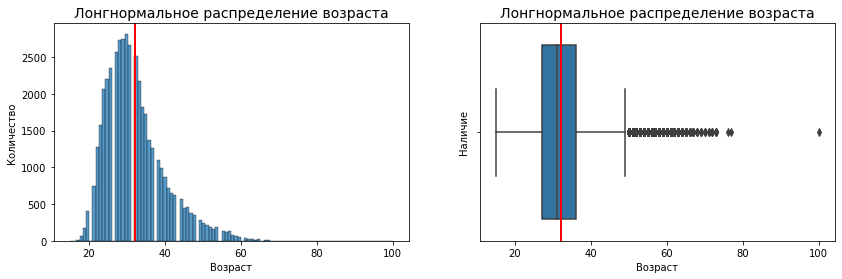

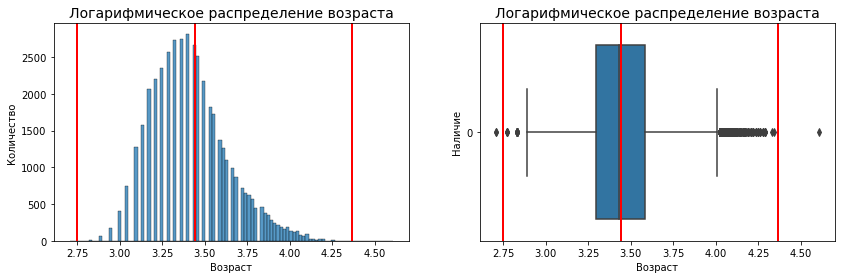

In [900]:
# ваш код здесь


# Лонгнормальное распределение, seaborn, subplots - до очистки данных

max_age = hh_data['Возраст'].max()
print('Максимальный возраст: ', max_age)
mean_age = hh_data['Возраст'].mean()
print('Средний возраст: ', round(mean_age, 2))

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 4))

sns.histplot(data = hh_data, x = 'Возраст', bins = 100, ax = axes[0])
axes[0].set_title('Лонгнормальное распределение возраста', fontsize = 14)
axes[0].axvline(mean_age, lw = 2, c = 'red')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество')

sns.boxplot(data = hh_data, x = 'Возраст', orient = 'h', ax = axes[1])
axes[1].set_title('Лонгнормальное распределение возраста', fontsize = 14)
axes[1].axvline(mean_age, lw = 2, c = 'red')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Наличие')

print('Асимметрия лонгормального распределения: ', hh_data['Возраст'].skew())


# Логарифмическое распределение, seaborn, subplots - до очистки данных с краевыми маркерами очистки по z-методу n сигм 

hh_data_log = pd.Series(name = 'Возраст', dtype = 'float')
hh_data_log = np.log(hh_data['Возраст'])
# display(hh_data_log)

max_age = hh_data_log.max()
print('Максимальный логарифмический возраст: ', max_age)
mean_age_log = hh_data_log.mean()
print('Средний логарифмический возраст: ', round(mean_age_log, 2))

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 4))

sns.histplot(data = hh_data_log, bins = 100, ax = axes[0])
axes[0].set_title('Логарифмическое распределение возраста', fontsize = 14)
axes[0].axvline(mean_age_log, lw = 2, c = 'red')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество')

sns.boxplot(data = hh_data_log, orient = 'h', ax = axes[1])
axes[1].set_title('Логарифмическое распределение возраста', fontsize = 14)
axes[1].axvline(mean_age_log, lw = 2, c = 'red')
axes[1].set_xlabel('Возраст')
axes[1].set_ylabel('Наличие')

print('Асимметрия логарифмического распределения: ', hh_data_log.skew())



# Очищаю выборку по методу n сигм с возможностью логарифмирования 
# (применять к базовой выборке, еще не бывшей прологарифмированной)

# Функция вычисления выбросов и очищенной от выбросов выборки
def z_methode_n_sigmas(data, col, left_n_sigmas=3, right_n_sigmas=3, log_scale=False):

    """
    Функция исполняет z-метод (метод трех сигм с уточнением количества сигм) для датафрейма
    на основании оценки на выбросы столбца датафрейма
    и выводит датафреймы выбросов, очищенный датафрейм, а также нижний и верхний край фильтрации  

    Args: 
    data - датафрейм, col - столбец,
    left_n_sigmas - количество сигм слева,
    right_n_sigmas - количество сигм справа,
    log_scale - возможность логарифмирования
        
    Returns: 
    outliers - строки выбросов
    cleaned - очищенный датафрейм
    lower_bound - нижний край фильтрации
    upper_bound -  верхний край фильтрации
        
    """
    
    if log_scale:
        ser = np.log(data[col])
    else:
        ser = data[col]

    math_expectation = ser.mean()
    sigma = ser.std()
    
    lower_bound = math_expectation - left_n_sigmas * sigma
    upper_bound = math_expectation + right_n_sigmas * sigma
    
    outliers = data[(ser < lower_bound) | (ser > upper_bound)]
    cleaned = data[(ser > lower_bound) & (ser < upper_bound)]
    
    return outliers, cleaned, lower_bound, upper_bound

outliers, cleaned, lower_bound, upper_bound = z_methode_n_sigmas(hh_data, 
                                                                 col = 'Возраст', 
                                                                 left_n_sigmas = 3, right_n_sigmas = 4, 
                                                                 log_scale = True)
hh_data = cleaned
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {hh_data.shape[0]}')


# Дорисовываю линии n сигм на график логарифмического распределения

axes[0].axvline(lower_bound, lw = 2, c = 'red')
axes[0].axvline(upper_bound, lw = 2, c = 'red')
axes[1].axvline(lower_bound, lw = 2, c = 'red')
axes[1].axvline(upper_bound, lw = 2, c = 'red')


# Потенцирование - Возвращаю из логарифмической размерности в обычную позиции крайних границ

print(f'Нижняя граница выбросов в логарифмической шкале: {round(lower_bound, 2)}')
print(f'Верхняя граница выбросов в логарифмической шкале: {round(upper_bound, 2)}')

lower_bound_common =  np.exp(lower_bound)
upper_bound_common = np.exp(upper_bound)

print(f'Нижняя граница выбросов в лонгнормальной шкале: {round(lower_bound_common, 2)}')
print(f'Верхняя граница выбросов в лонгнормальной шкале: {round(upper_bound_common, 2)}')

lower_deleted = outliers[outliers['Возраст'] < lower_bound_common].shape[0]
upper_deleted = outliers[outliers['Возраст'] > upper_bound_common].shape[0]
sum_deleted = lower_deleted + upper_deleted

print(f'Удалено снизу {lower_deleted} строк(и)')
print(f'Удалено сверху {upper_deleted} строк(и)')
print(f'Удалено всего {sum_deleted} строк(и)')

print()

print('Удаленны строки с возрастами:')
display(outliers['Возраст'])

Судя по знаку, логарифмическое распределение имеет правую асимметрию.
С учетом того, что справа мы взяли допутимый диапазон 4 сигмы, а слева - 3 сигмы, в процессе преобразований получено, что нижняя граница фильтрации выбросов - 15.66 лет, верхняя граница фильтрации выбросов - 78.88 лет.
В результате очистки датафрейма z-методом было удалено слева (для нижних возрастов) 2 строки (заявителям по 15 лет) и справа (для старших возрастов) - 1 строка (заявителю 100 лет).
Заявители с возрастом 15 лет могли попасть в базу вполне для них осознанно. Вместе с тем, вряд ли столь молодые люди сильно интересуют работодателей. Впрочем, возможно, существует какая-то деятельность, где они бы могли пригодиться. В базе эти люди останутся. Но в силу их молодости, возможно, все-таки имеет смысл довериться математике и не считать их органичной частью рынка труда. А значит, для статистики можно соответствующие им строки из датафрейма  удалить.
Заявитель в возрасте 100 лет очевидно совершил подлог, предоставив нереальный возраст. Он мог сообщить недостоверную информацию и по другим столбцам. Вполне целесообразно в статистике его не учитывать. 